# Project 4

Sales Data Aggregator

Description:

The Sales Data Aggregator project is a beginner-friendly exercise for working with sales data using Pandas. The project involves loading a CSV file containing sales information, aggregating data to calculate total revenue, average sales per region or product, and identifying trends. This project helps learners practice data cleaning, grouping, and visualization techniques.

Algorithm
- Import the required libraries (Pandas, Matplotlib, Seaborn).

- Load the CSV file into a Pandas DataFrame.

- Handle missing values by:

    - Handle missing values

    - Convert date columns to datetime format.

- Analyze the data:

    - Calculate total revenue by region and product.

    - Determine the average units sold per product or region.

    - Analyze trends over time (e.g., monthly sales).

- Visualize the results using charts:

    - Bar chart

    - Line plot
    - Histogram
    - Pie chart
- Display the findings and visualizations.

Key Features
- Aggregates and analyzes sales data by region, product, and time.

- Calculates total revenue, average units sold, and trends.

- Visualizes insights with bar charts, line plots, and pie charts.

- Offers practical experience in working with business datasets.

- Reinforces Pandas and data visualization skills for beginners.

## Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Import  Dataset

link source: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

About the Dataset
This Vehicle Sales and Market Trends dataset contains complete information about vehicle sales transactions, including data such as brand, model, year of manufacture, transmission type, sales price, date of sale, as well as vehicle condition and mileage (odometer). In addition, there are also Manheim Market Report (MMR) values that reflect the market value of the vehicle.

Key Features:
1. Vehicle Information: Vehicle make, model, trim, and year of manufacture.
2. Transaction Data: Sale price, sale date, and vehicle condition.
3. Market Trend: MMR value to identify market price fluctuations.
4. Condition & Mileage: Analyse how these factors affect the selling price of the vehicle.

Potential Uses:
- Market Analysis: Understand price and demand trends in the automotive market.
- Predictive Modelling: Build vehicle price prediction models based on attributes such as condition and mileage.
- Business Insights: Assist dealers and industry professionals in vehicle pricing and demand strategies.

Format:
The dataset is available in CSV format, with each row representing a vehicle sales transaction.

Data Integrity:
This dataset has been verified to ensure its accuracy and reliability, though further validation is recommended.

In [2]:
# import dataset
df = pd.read_csv(r'D:\File Belajar\Belajar Data\Udemy\pandas\Project\Project 4\car_prices.csv')
df.head(2)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [3]:
# Show row and column dataset
print('Row:', df.shape[0], 'Column:', df.shape[1])

Row: 558837 Column: 16


In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


The following is a brief explanation of the column names in the Vehicle Sales and Market Trends dataset:

- Year: Year of vehicle manufacture.
- Make: The brand of the vehicle (e.g. Toyota, Honda).
- Model: Vehicle model (e.g. Corolla, Civic).
- Trim: Vehicle version or type (e.g. sport, luxury).
- Body: Vehicle body type (e.g. sedan, SUV).
- Transmission: Vehicle transmission type (e.g. automatic, manual).
- VIN: Vehicle Identification Number.
- State: The state where the vehicle is registered.
- Condition: The condition of the vehicle (e.g. new, used).
- Color: The colour of the vehicle.
- Interior: The interior of the vehicle.
- Seller: Vehicle seller information.
- MMR: Manheim Market Report value (estimate the market value of the vehicle).
- Saleprice: The selling price of the vehicle.
- Saledate: The date of the vehicle sale transaction.

In [5]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Key Points:

Vehicle Year (year):
- Vehicle year range: 1982-2015.
- The majority of vehicles are from 2000-2015, with an average year of manufacture of 2010.

Vehicle Condition (condition):
- Vehicle condition varies with an average score of around 30.67.
- Condition range: 1 (probably very bad) to 49 (probably very good).

Mileage (Odometer):
- The average vehicle mileage is 68,320 km.
- Some vehicles have very low mileage (1 km), while others are close to 1 million km (999,999 km).

Market Value (MMR):
- The market value of the vehicle ranges from 25 USD to 182,000 USD, with an average of about 13,769 USD.
- There are large fluctuations, with most vehicles having a market value of around 7,000-18,000 USD.

Selling Price:
- The selling price ranges from 1 USD to 230,000 USD, with an average of around 13,611 USD.
- Most vehicles sell for between 6,900-18,200 USD.

In [6]:
# berdasarkan dari analisis desrkripsi diatas, saya akan mengambil data penjualan mobil dari tahun 2000 - 2015
df = df[(df['year']>= 2000)]
df.shape

(549304, 16)

## Exploratory Data Analysis (EDA)

### Drop some value in dataset

In [7]:
# Drop column yang tidak dibutuhkan
df.drop(['vin','state'], axis=1, inplace=True)
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Handle Missing Value

In [8]:
df.isna().sum()

year                0
make             9259
model            9357
trim             9561
body            11767
transmission    64016
condition       11001
odometer           84
color             731
interior          731
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [9]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
cat_columns = df.select_dtypes(include=[object])

df[numeric_columns].fillna(df[numeric_columns].mean(), inplace=True)

for col in cat_columns:
    mode_col = df[col].mode()[0]
    df[col].fillna(mode_col, inplace=True)

# Mengisi NaN di kolom numerik dengan median
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['mmr'].fillna(df['mmr'].median(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].median(), inplace=True)

df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [10]:
df.shape

(549304, 14)

### Change Format datetime

In [11]:
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [12]:
# Fungsi untuk mengubah format dengan menghapus informasi zona waktu
def remove_timezone(date_str):
    # Menggunakan regex untuk menghapus bagian zona waktu (GMT-0800 (PST))
    return re.sub(r' GMT.*', '', date_str)

# Terapkan fungsi untuk membersihkan kolom saledate
df['saledate'] = df['saledate'].apply(remove_timezone)

# Sekarang ubah format menjadi datetime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

# Tampilkan hasil
print(df['saledate'])

0        2014-12-16 12:30:00
1        2014-12-16 12:30:00
2        2015-01-15 04:30:00
3        2015-01-29 04:30:00
4        2014-12-18 12:30:00
                 ...        
558832   2015-07-09 07:00:00
558833   2015-07-08 09:30:00
558834   2015-07-08 09:30:00
558835   2015-07-09 06:45:00
558836   2015-05-28 05:30:00
Name: saledate, Length: 549304, dtype: datetime64[ns]


In [13]:
df.isna().sum()

year             0
make             0
model            0
trim             0
body             0
transmission     0
condition        0
odometer         0
color            0
interior         0
seller           0
mmr              0
sellingprice     0
saledate        26
dtype: int64

In [14]:
df['saledate'] = df['saledate'].fillna(df['saledate'].mean())
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

### Change value color

In [ ]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime',
       '4802', '9410', '1167', '2172', '14872', '12655', '15719', '6388',
       '16633', '11034', '2711', '6864', '339', '18384', '9887', '9837',
       '20379', '20627', '721', '6158', '2817', '5705', '18561', '2846',
       '9562', '5001'], dtype=object)

In [16]:
# Daftar pemetaan angka ke warna
color_mapping = {
    '4802': 'red', '9410': 'blue','1167': 'green','2172': 'yellow',
    '14872': 'red', '12655': 'blue','15719': 'green','6388': 'yellow',
    '16633': 'red', '11034': 'blue','2711': 'green','6864': 'yellow',
    '339': 'red', '18384': 'blue','9887': 'green','9837': 'yellow',
    '20379': 'red', '20627': 'blue','721': 'green','6158': 'yellow',
    '2817': 'red', '5705': 'blue','18561': 'green','2846': 'yellow',
    '9562': 'red', '5001': 'blue',
}

# Ganti nilai angka dengan warna yang sesuai dari pemetaan
df['color'] = df['color'].replace(color_mapping)

# Cek hasil setelah perubahan
print(df['color'].unique())

['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime']


### Analyse the sales price of the most expensive and cheapest cars

In [17]:
df.head(3)

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00


In [18]:
max_sale = df.groupby('make')

max_yr = max_sale['sellingprice'].sum()
make_sale_high = max_yr.sort_values(ascending=False)
print('Harga Merek Mobil Termahal:\n', make_sale_high.head())

make_sale_lowest = max_yr.sort_values(ascending=True)
print('\nHarga Merek Mobil Termurah:\n', make_sale_lowest.head())

Harga Merek Mobil Termahal:
 make
Ford         1.449757e+09
Chevrolet    7.201026e+08
Nissan       6.328781e+08
Toyota       4.868272e+08
BMW          4.437567e+08
Name: sellingprice, dtype: float64

Harga Merek Mobil Termurah:
 make
Daewoo        1200.0
plymouth      1900.0
chev truck    2000.0
hyundai tk    2100.0
ford tk       2800.0
Name: sellingprice, dtype: float64


Information:
- Top 5 most expensive car brands are Ford, Chevrolet, Nissan, Toyota, and BMW
- Top 5 cheapest car brands are Daewoo, plymouth, chev truck, hyundai tk, and ford tk
- The most expensive car is ford with a price of around 1.45 billion
- Daewoo cars have the lowest price of 1,200

### Average Mobile price by transmission type

In [19]:
color_group = df.groupby('transmission')
type_group = color_group['sellingprice'].mean()
type_group

transmission
Sedan        13686.363636
automatic    13894.203089
manual       11644.077653
sedan        13650.000000
Name: sellingprice, dtype: float64

Information:
- Automatic transmission: The highest average price, approximately USD 13,894.20.
- Manual transmission: The average price is lower, around USD 11,644.08.
- Sedans and saloons have almost the same price, around USD 13,650.00.
- Cars with automatic transmissions tend to have a higher selling price.
- Cars with manual transmissions are cheaper on average than those with automatic transmissions.

### Most expensive car sales per year

In [20]:
group_year = df.groupby('year')['sellingprice'].sum()
sale_year = group_year.sort_values(ascending=False)
sale_year

year
2013    1.715602e+09
2012    1.703920e+09
2014    1.628697e+09
2011    7.695672e+08
2010    3.287438e+08
2008    2.995227e+08
2007    2.474377e+08
2015    2.447214e+08
2009    2.154609e+08
2006    1.665970e+08
2005    1.047020e+08
2004    7.494301e+07
2003    4.578318e+07
2002    2.537276e+07
2001    1.378340e+07
2000    9.554089e+06
Name: sellingprice, dtype: float64

Information:
- 2013: Car sales reached approximately USD 1.72 billion, becoming the highest ever.
- 2000: Car sales were only about USD 9.55 million, which was the lowest in the period.
- Automobile sales peaked in 2013 and 2012, while 2000 and 2001 saw significant declines in sales.

## Visualisasi Data

### Visualisasi Bar Plot

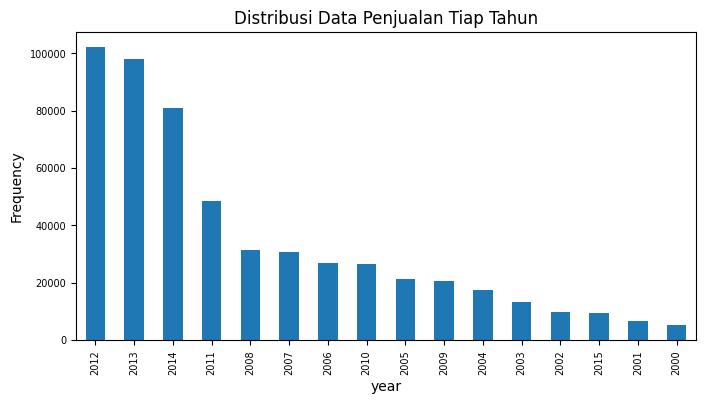

In [21]:
# Barplot Graph

plt.figure(figsize=(8,4))
df['year'].value_counts().plot(kind='bar', fontsize=7)
plt.title('Distribusi Data Penjualan Tiap Tahun')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

Information:
- The most sales were in 2012 and 2013
- lowest sales were in 2000

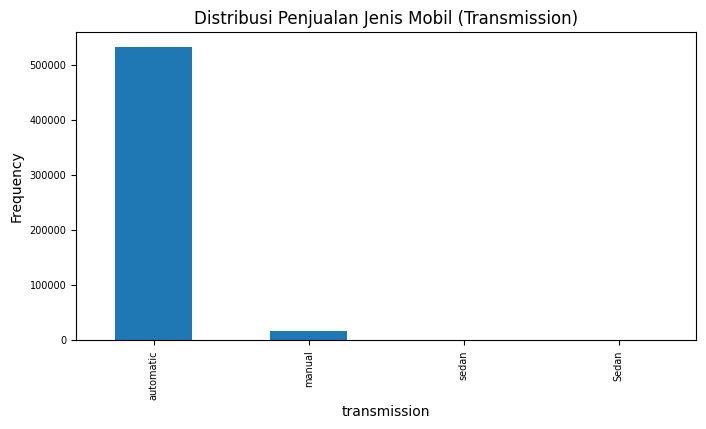

In [22]:
# Barplot Graph

plt.figure(figsize=(8,4))
df['transmission'].value_counts().plot(kind='bar', fontsize=7)
plt.title('Distribusi Penjualan Jenis Mobil (Transmission)')
plt.xlabel('transmission')
plt.ylabel('Frequency')
plt.show()

Information:
- Automatic car types have a very high number of sales compared to other types.

In [23]:
def generate_rating_df(df):
    rating_df = df.groupby(['year', 'make']).agg({'sellingprice': 'count'}).reset_index()
    rating_df = rating_df[rating_df['sellingprice'] != 0]
    rating_df.columns = ['year', 'make', 'counts']
    rating_df = rating_df.sort_values('make')
    return rating_df

rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='year', y='counts', color='make')
fig.update_traces(textposition='auto',
textfont_size=20)
fig.update_layout(barmode='group')
fig.show()

Information:
- Car sales increased rapidly in 2012 - 2014
- out of the last 15 years, the highest priced ford cars were bought in 2013 - 2014
- Sales in 2015 declined with fewer luxury cars purchased.

### Visualisasi Line Chart

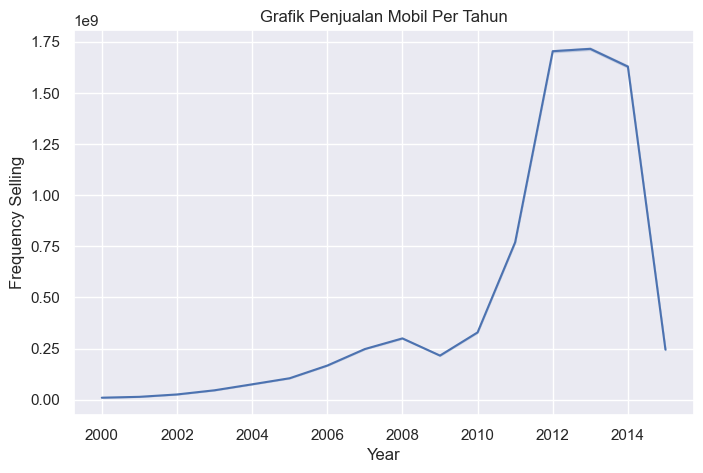

In [24]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mengatur ukuran gambar
plt.figure(figsize=(8,5))

# Menggambar lineplot
sns.lineplot(
    data=df, 
    x='year', 
    y='sellingprice', 
    palette='viridis', 
    estimator='sum',  # Menghitung rata-rata jika ada banyak nilai per tahun
    sort=True # Mengatur agar tahun diurutkan
    )
plt.title('Grafik Penjualan Mobil Per Tahun')
plt.xlabel('Year')
plt.ylabel('Frequency Selling')

plt.show()

Information:
- Sales increased rapidly in 2012-2014
- After 2014 sales declined dramatically until 2015

### Visualisasi Histogram Plot

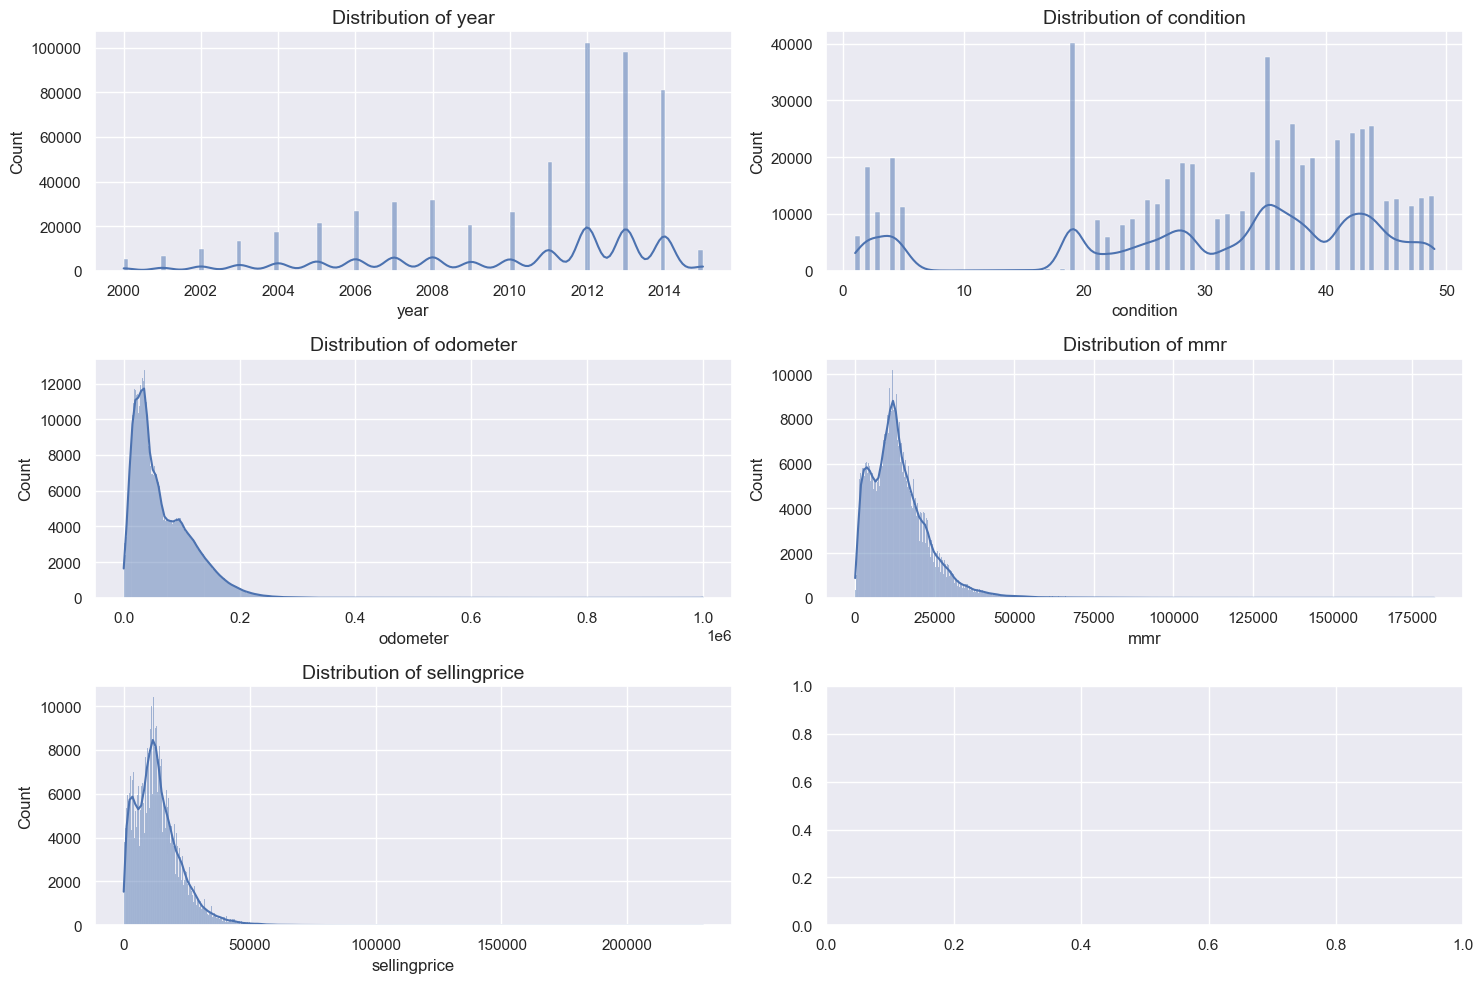

In [25]:
num_col = df.select_dtypes(include=['int64', 'float64'])

# membuat sebuah figure (gambar) yang berisi grid subplot dengan 3 baris dan 2 kolom, sehingga total ada 6 subplot.
fig, axes = plt.subplots(3, 2 ,figsize=(15, 10))

# mengubah array 2D dari subplot (3 baris x 2 kolom) menjadi array 1D dengan 6 elemen.
axes = axes.flatten()

for i, column in enumerate(num_col):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], palette='viridis') #ax=axes[i]: Menentukan subplot mana yang akan digunakan untuk plot in
    # menambahkan judul untuk setiap subplot, yang menampilkan nama kolom.
    axes[i].set_title(f'Distribution of {column}', fontsize=14)

# menghapus subplot yang tidak diperlukan dengan menggunakan fig.delaxes(axes[i]).
for i in range(len(num_col), 3 * 2):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

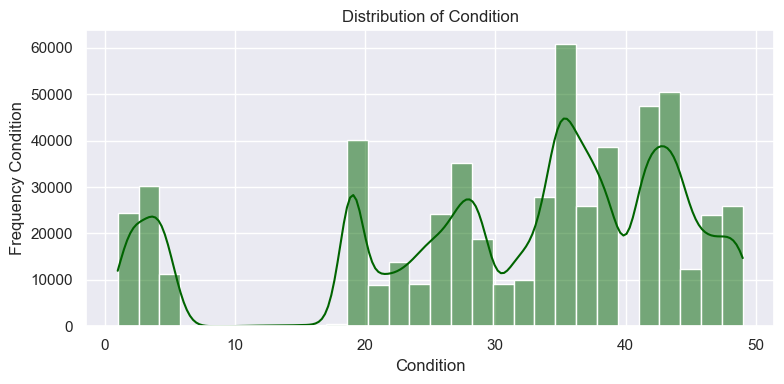

In [26]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='condition', bins=30, kde=True, color='darkgreen')
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency Condition')
plt.tight_layout()
plt.show()

Information:
- Condition determines new and used cars.
- The lower the condition, the more used the car is.
- the higher the condition value, the better or newer the car quality.
- the majority of cars are in the range of 20 - 50
- there is some data that is in the 0-10 condition


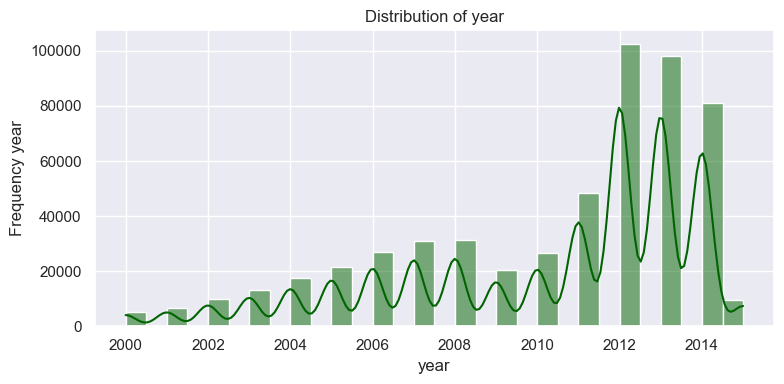

In [27]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='year', bins=30, kde=True, color='darkgreen')
plt.title('Distribution of year')
plt.xlabel('year')
plt.ylabel('Frequency year')
plt.tight_layout()
plt.show()

Information:
- the frequency of sales each year is increasing and there was a decrease during 2009 - 2010
- car sales increased in 2012 - 2014


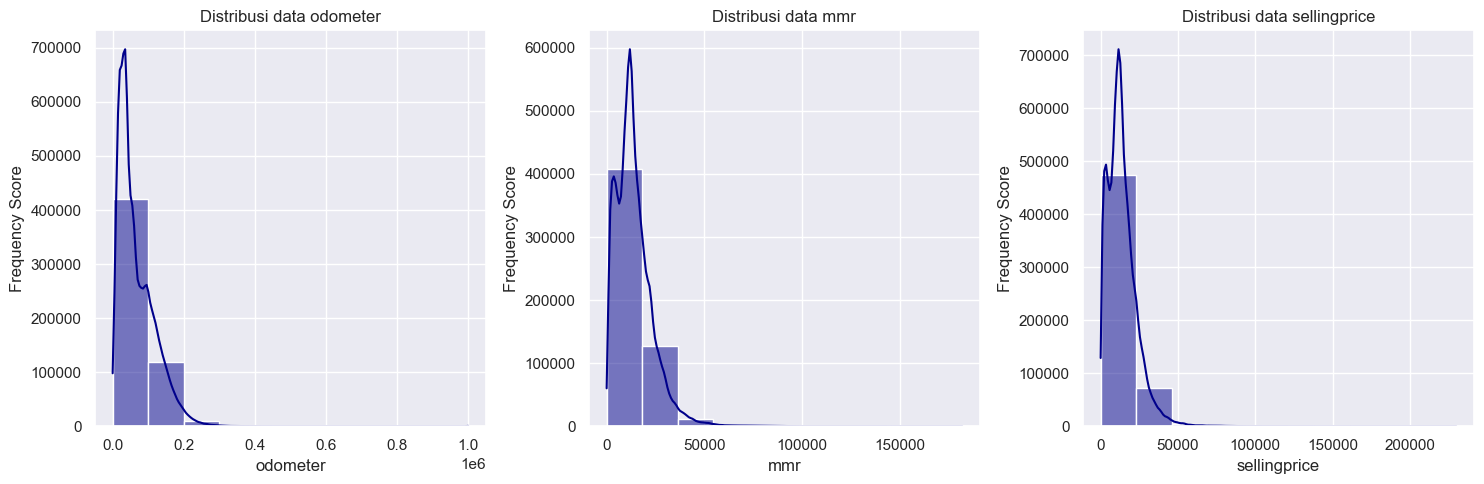

In [28]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mempersiapkan data dan parameter
columns_to_plot = ['odometer', 'mmr', 'sellingprice']
titles = ["Distribusi data odometer", "Distribusi data mmr", "Distribusi data sellingprice"]

# Mengatur ukuran gambar
plt.figure(figsize=(15, 5))

# Loop untuk membuat subplot
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)  # 1 baris, 3 kolom, subplot i+1
    sns.histplot(data=df, x=column, bins=10, kde=True, color='darkblue')
    plt.title(titles[i])  # Menetapkan judul dari array titles
    plt.xlabel(column)
    plt.ylabel('Frequency Score')

# Menampilkan plot
plt.tight_layout()  # Untuk memastikan tidak ada tumpang tindih antara subplot
plt.show()

Information:
- All three features show data that is not evenly distributed and is more skewed to the right.
- there is more data in the range around 0
